# Group 8 Code

### References
https://jupyter.yahya14.xyz/files/CP322/Project/CP322prj2022W.pdf

https://docs.google.com/document/d/1TW3mR9nN-tbLMuITZzlaCki0iNHIIerGOLUW2P7NQ_U/edit

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews?select=Womens+Clothing+E-Commerce+Reviews.csv

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.model_selection import KFold
from sklearn import preprocessing

raw_df = pd.read_csv('data\Womens Clothing E-Commerce Reviews.csv', delimiter=',')
raw_df.head(5)
#Converting to numbers for cats
le = preprocessing.LabelEncoder()
ae = le.fit_transform(raw_df['Review Text'])
be = le.fit_transform(raw_df['Title'])
ce = le.fit_transform(raw_df['Division Name'])
de = le.fit_transform(raw_df['Department Name'])
ee = le.fit_transform(raw_df['Class Name'])

raw_df['Review Text'] = ae
raw_df['Title'] = be 
raw_df['Division Name'] = ce 
raw_df['Department Name'] = de
raw_df['Class Name'] = ee


#Reccomend IND,Title,Review Text,

In [2]:
#Information Based Models
raw_df.describe()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,8073.055650,11723.907008,4.196032,0.822362,2.535936,0.475432,2.360385,6.942476
std,6779.968547,203.298980,12.279544,4458.457431,6752.194570,1.110031,0.382216,5.702202,0.617167,1.633476,5.217702
min,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4296.000000,5870.250000,4.000000,1.000000,0.000000,0.000000,1.000000,3.000000
50%,11742.500000,936.000000,41.000000,8049.500000,11740.500000,5.000000,1.000000,1.000000,0.000000,2.000000,7.000000
75%,17613.750000,1078.000000,52.000000,12399.750000,17606.750000,5.000000,1.000000,3.000000,1.000000,4.000000,10.000000
max,23485.000000,1205.000000,99.000000,13993.000000,22634.000000,5.000000,1.000000,122.000000,3.000000,6.000000,20.000000


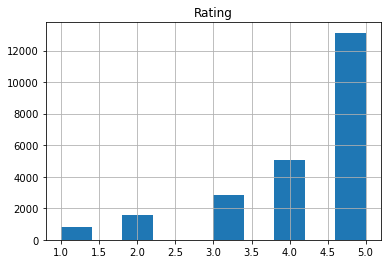

In [3]:
#Plots
boxdf = raw_df.hist(column = "Rating")

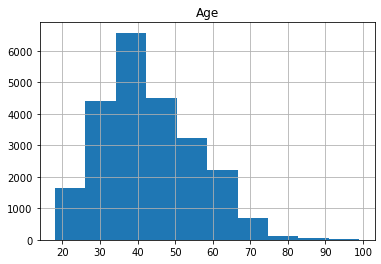

In [4]:
bowdf = raw_df.hist(column = "Age")

In [5]:
#Train-test split
y = raw_df.loc[:,'Rating']
X = raw_df.loc[:,['Unnamed: 0','Clothing ID','Age','Title','Review Text','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)
folds = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [6]:
d1 = DecisionTreeClassifier(criterion = 'gini')
d1.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
d2 = DecisionTreeClassifier(criterion = 'entropy')
d2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
cvs = cross_val_score(reg1,X_train,y_train,cv=folds,scoring = 'accuracy')
